In [1]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GraduationThesis/'))
sys.path.append(mp)

In [2]:
import torch
from modules import Rbf, IGR

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# Off surface points
filename = mp + '/dataset/2d/superior.vert'
dataset, normal_vectors = IGR.read_txt2(filename, device)

In [5]:
traineddata_path = mp + '/models/IRG_2D.traineddata'
model = IGR.load_model(traineddata_path, device)

In [6]:
model = IGR.train(dataset, normal_vectors, 5000, device, model)

Step 500:
tensor(0.4700, device='cuda:0', grad_fn=<AddBackward0>)
Step 1000:
tensor(0.4556, device='cuda:0', grad_fn=<AddBackward0>)
Step 1500:
tensor(0.4448, device='cuda:0', grad_fn=<AddBackward0>)
Step 2000:
tensor(0.4445, device='cuda:0', grad_fn=<AddBackward0>)
Step 2500:
tensor(0.4477, device='cuda:0', grad_fn=<AddBackward0>)
Step 3000:
tensor(0.4345, device='cuda:0', grad_fn=<AddBackward0>)
Step 3500:
tensor(0.4206, device='cuda:0', grad_fn=<AddBackward0>)
Step 4000:
tensor(0.4213, device='cuda:0', grad_fn=<AddBackward0>)
Step 4500:
tensor(0.4159, device='cuda:0', grad_fn=<AddBackward0>)
Step 5000:
tensor(0.4082, device='cuda:0', grad_fn=<AddBackward0>)


In [7]:
IGR.save_model(traineddata_path, model)

In [8]:
xx, yy = IGR.grid(dataset[:,0], dataset[:,1], device)

In [9]:
z = IGR.sampling(model, xx, yy)

tensor([[-4.0778e-01, -3.6458e-01, -3.1833e-01,  ..., -1.9230e+00,
         -2.0217e+00, -2.1231e+00],
        [-4.0400e-01, -3.6575e-01, -3.2417e-01,  ..., -1.8446e+00,
         -1.9438e+00, -2.0457e+00],
        [-3.9612e-01, -3.6029e-01, -3.2336e-01,  ..., -1.7677e+00,
         -1.8672e+00, -1.9689e+00],
        ...,
        [-1.2110e-01, -9.3034e-02, -6.5054e-02,  ..., -7.6127e-01,
         -8.2933e-01, -8.9818e-01],
        [-7.8812e-02, -4.9810e-02, -2.4330e-02,  ..., -8.3841e-01,
         -9.0565e-01, -9.7276e-01],
        [-3.2269e-02, -1.0033e-02, -1.0673e-03,  ..., -9.2274e-01,
         -9.9096e-01, -1.0577e+00]], device='cuda:0', grad_fn=<ViewBackward>)


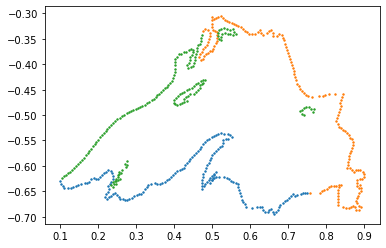

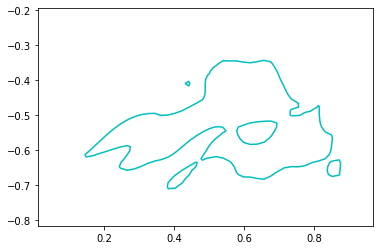

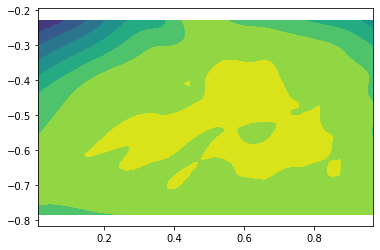

In [10]:
Rbf.visualize2(dataset.detach().cpu().numpy(), normal_vectors.detach().cpu().numpy(), xx.detach().cpu().numpy(), yy.detach().cpu().numpy(), z.detach().cpu().numpy(), scatter=True, vecfield=False, surface=True, offsurface=False, filled_contour=True)

In [11]:
# x = torch.tensor([[5, 3], [2, 1], [3,2]], dtype=torch.float)
# y = torch.tensor([[1,1], [1,2], [3,2]], dtype=torch.float)

# x = x.numpy()
# y = y.numpy()

# t = np.concatenate((x,y), axis = 1)

# # t = torch.matmul(torch.transpose(x, 0, 1),y)
# # t = torch.matmul(x[:, :], y[:,:)])
# # t = x * y [:, None]
# # t = torch.cat((x,y), dim=1)
# # t = t.numpy()
# # t = np.sum(t, axis=1)
# # t = np.sum(t, axis=1)

# print(t)

In [12]:
# x = torch.tensor([[5, 3], [0, 1], [3,2]], dtype=torch.float)
# y = torch.tensor([[1,1], [1,2], [2,3]], dtype=torch.float)
# w = torch.tensor([[5], [2], [1]], dtype=torch.float)

# t = torch.cat((x,y), axis = 0)

# n = torch.norm(t, dim=1)
# # n = torch.reshape(n, (n.shape[0],1))

# n = F.normalize(t)

# # # t = torch.matmul(torch.transpose(x, 0, 1),y)
# # # t = torch.matmul(x[:, :], y[:,:)])
# # t = x - y [:, None]
# # # t = torch.cat((x,y), dim=1)
# # # t = t.numpy()
# # t = torch.sum(t, dim=2)
# # # t = w*t
# # # t = torch.sum(t, dim=0)

# print(t)
# print(n)
# # print(normal_vectors)

In [13]:
# x = torch.tensor([[5], [2], [1], [3],[2]], dtype=torch.float)
# y = torch.tensor([1, 2, 3, 4], dtype=torch.float)

# # t = x[None, :] * y[:, None]
# t = x * y
# t = torch.sum(t, dim=0)
# print(t)